In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import os
cwd=os.getcwd()
os.chdir('/content/drive/My Drive/Colab Notebooks/JantaHackJul25')

In [ ]:
import pandas as pd
train = pd.read_csv('train_yaOffsB.csv')
test = pd.read_csv('test_pFkWwen.csv')

# Last Man Standing Approach


## Data Pre-Processing

In [ ]:
# imputing all the null values with -1
# doubt, why is it being imputed witb -1 and not any other number
train.fillna(-1, inplace=True)
test.fillna(-1,inplace=True)

In [ ]:
# logic behind ID number extraction, just delete the damn F
#train['ID'][0]
s = train['ID'][0]
print(s[1:])

00000001


In [ ]:
train1 = train
test1 = test

In [ ]:
train1['ID'] = train.apply(lambda x : int(x['ID'][1:]), axis = 1)
test1['ID'] = test.apply(lambda x : int(x['ID'][1:]), axis =1)

In [ ]:
#Appending both the datasets to create a combined dataset
result = train1.append(test1, sort=False)

In [ ]:
result = result.reset_index(drop=True)

In [ ]:
# sort by ID to find out patterns 
result= result.sort_values(by=['ID'])

## Feature Engineering

In [ ]:
# make the loop
# the features that we are targeting are - 
'''
1 - Group
2 - Group_Change 
3 - Group_First
4 - Group_Last
5 - Batch_Last
'''
# doubt being what exactly are these

# Initialization
result['Group'] = 0 
result['Group'][0] = 1
result['Group_Change'] = 0
result['Group_First'] = 0
result['Group_Last'] = 0
result['Batch_Last'] = 0
result['Group_First'][0] = 1
result['Soil_Change'] = 0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
result

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage,Group,Group_Change,Group_First,Group_Last,Batch_Last,Soil_Change
0,1,188,1,0,1,0,0.0,0,1,0.0,1,0,1,0,0,0
88858,2,188,1,1,1,0,-1.0,0,2,NaN,0,0,0,0,0,0
1,3,209,1,0,1,0,0.0,0,2,1.0,0,0,0,0,0,0
2,4,257,1,0,1,0,0.0,0,2,1.0,0,0,0,0,0,0
3,5,257,1,1,1,0,0.0,0,2,1.0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148165,155941,3702,1,0,2,10,-1.0,48,1,NaN,0,0,0,0,0,0
88856,155942,3702,1,0,2,10,25.0,18,3,0.0,0,0,0,0,0,0
148166,155943,3702,1,0,2,10,28.0,17,2,NaN,0,0,0,0,0,0
148167,155944,3895,1,0,2,5,52.0,7,1,NaN,0,0,0,0,0,0


In [ ]:
#Start loop
for i in range(2,result.shape[0]):
  if (abs(result['Estimated_Insects_Count'][i] - result['Estimated_Insects_Count'][i-1]) > 1):
    result['Group'][i] = result['Group'][i-1] + 1
    result['Group_First'][i] = 1
    result['Group_Last'][i-1] = 1
    result['Batch_Last'][i-1] = 1
    result['Group_Num'] = 1
  else:
    if (result['Number_Doses_Week'][i] >= result['Number_Doses_Week'][i-1]):
      if (result['Soil_Type'][i] == result['Soil_Type'][i-1]):
        result['Group'][i] = result['Group'][i-1]
        result['Group_Num'][i] = result['Group_Num'][i-1] + 1
      else:
        result['Group'][i] = result['Group'][i-1] + 1
        result['Group_Num'] = 1
    else:
      result['Group'][i] = result['Group'][i-1] + 1
      result['Group_Change'][i] = 1
      result['Group_First'][i] = 1
      result['Group_Last'][i-1] = 1
      result['Group'][i] = result['Group'][i-1] + 1
  if (i%1000==0):
    print(i,'th iteration completed')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: Se

1000 th iteration completed
2000 th iteration completed
3000 th iteration completed
4000 th iteration completed
5000 th iteration completed
6000 th iteration completed
7000 th iteration completed
8000 th iteration completed
9000 th iteration completed
10000 th iteration completed
11000 th iteration completed
12000 th iteration completed
13000 th iteration completed
14000 th iteration completed
15000 th iteration completed
16000 th iteration completed
17000 th iteration completed
18000 th iteration completed
19000 th iteration completed
20000 th iteration completed
21000 th iteration completed
22000 th iteration completed
23000 th iteration completed
24000 th iteration completed
25000 th iteration completed
26000 th iteration completed
27000 th iteration completed
28000 th iteration completed
29000 th iteration completed
30000 th iteration completed
31000 th iteration completed
32000 th iteration completed
33000 th iteration completed
34000 th iteration completed
35000 th iteration comp

In [ ]:
for i in range(1,(result.shape[0]-1)):
  if(result['Group_Last'][i] == 1 and result['Soil_Type'][i] != result['Soil_Type'][i+1]):
    result['Soil_Change'][i] = 1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
result

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage,Group,Group_Change,Group_First,Group_Last,Batch_Last,Soil_Change,Group_Num
0,1,188,1,0,1,0,0.0,0,1,0.0,1,0,1,0,0,0,1
88858,2,188,1,1,1,0,-1.0,0,2,NaN,19208,0,1,1,1,0,1
1,3,209,1,0,1,0,0.0,0,2,1.0,0,0,0,1,1,0,1
2,4,257,1,0,1,0,0.0,0,2,1.0,1,0,1,0,0,0,1
3,5,257,1,1,1,0,0.0,0,2,1.0,2,0,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148165,155941,3702,1,0,2,10,-1.0,48,1,NaN,34925,0,1,0,0,0,1
88856,155942,3702,1,0,2,10,25.0,18,3,0.0,19206,0,1,1,1,0,1
148166,155943,3702,1,0,2,10,28.0,17,2,NaN,34925,0,0,1,1,0,1
148167,155944,3895,1,0,2,5,52.0,7,1,NaN,34926,0,1,0,0,0,1


In [ ]:
testRedifined = result.loc[result['Crop_Damage'].isnull()]
trainRedifined = result.dropna()

In [ ]:
testRedifined = testRedifined.drop(columns=['ID','Crop_Damage']).reset_index(drop=True)
trainRedifined = trainRedifined.drop(columns=['ID']).reset_index(drop=True)

In [ ]:
trainRedifined

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage,Group,Group_Change,Group_First,Group_Last,Batch_Last,Soil_Change,Group_Num
0,188,1,0,1,0,0.0,0,1,0.0,1,0,1,0,0,0,1
1,209,1,0,1,0,0.0,0,2,1.0,0,0,0,1,1,0,1
2,257,1,0,1,0,0.0,0,2,1.0,1,0,1,0,0,0,1
3,257,1,1,1,0,0.0,0,2,1.0,2,0,0,1,1,1,1
4,342,1,0,1,0,0.0,0,2,1.0,3,0,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88853,3337,1,0,2,10,12.0,44,3,0.0,19204,0,1,1,1,0,1
88854,3516,1,0,2,10,20.0,38,1,0.0,19205,0,1,0,0,0,1
88855,3516,1,0,2,15,40.0,8,2,0.0,19205,0,0,1,1,0,1
88856,3702,1,0,2,10,25.0,18,3,0.0,19206,0,1,1,1,0,1


## Data Scaling

In [ ]:
# Robust Scalar
from sklearn.preprocessing import RobustScaler
train = trainRedifined.copy()

In [ ]:
trainRedifined

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage,Group,Group_Change,Group_First,Group_Last,Batch_Last,Soil_Change,Group_Num
0,188,1,0,1,0,0.0,0,1,0.0,1,0,1,0,0,0,1
1,209,1,0,1,0,0.0,0,2,1.0,0,0,0,1,1,0,1
2,257,1,0,1,0,0.0,0,2,1.0,1,0,1,0,0,0,1
3,257,1,1,1,0,0.0,0,2,1.0,2,0,0,1,1,1,1
4,342,1,0,1,0,0.0,0,2,1.0,3,0,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88853,3337,1,0,2,10,12.0,44,3,0.0,19204,0,1,1,1,0,1
88854,3516,1,0,2,10,20.0,38,1,0.0,19205,0,1,0,0,0,1
88855,3516,1,0,2,15,40.0,8,2,0.0,19205,0,0,1,1,0,1
88856,3702,1,0,2,10,25.0,18,3,0.0,19206,0,1,1,1,0,1


In [ ]:
train

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage,Group,Group_Change,Group_First,Group_Last,Batch_Last,Soil_Change,Group_Num
0,188,1,0,1,0,0.0,0,1,0.0,1,0,1,0,0,0,1
1,209,1,0,1,0,0.0,0,2,1.0,0,0,0,1,1,0,1
2,257,1,0,1,0,0.0,0,2,1.0,1,0,1,0,0,0,1
3,257,1,1,1,0,0.0,0,2,1.0,2,0,0,1,1,1,1
4,342,1,0,1,0,0.0,0,2,1.0,3,0,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88853,3337,1,0,2,10,12.0,44,3,0.0,19204,0,1,1,1,0,1
88854,3516,1,0,2,10,20.0,38,1,0.0,19205,0,1,0,0,0,1
88855,3516,1,0,2,15,40.0,8,2,0.0,19205,0,0,1,1,0,1
88856,3702,1,0,2,10,25.0,18,3,0.0,19206,0,1,1,1,0,1


In [ ]:
x_columns = train.columns

In [ ]:
list(x_columns[0:8])

['Estimated_Insects_Count',
 'Crop_Type',
 'Soil_Type',
 'Pesticide_Use_Category',
 'Number_Doses_Week',
 'Number_Weeks_Used',
 'Number_Weeks_Quit',
 'Season']

In [ ]:
scaler = RobustScaler()

train[list(x_columns[0:8])] = scaler.fit_transform(train[list(x_columns[0:8])])

train.head()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage,Group,Group_Change,Group_First,Group_Last,Batch_Last,Soil_Change,Group_Num
0,-0.877464,1.0,0.0,-1.0,-0.8,-1.3,-0.4375,-1.0,0.0,1,0,1,0,0,0,1
1,-0.859469,1.0,0.0,-1.0,-0.8,-1.3,-0.4375,0.0,1.0,0,0,0,1,1,0,1
2,-0.818338,1.0,0.0,-1.0,-0.8,-1.3,-0.4375,0.0,1.0,1,0,1,0,0,0,1
3,-0.818338,1.0,1.0,-1.0,-0.8,-1.3,-0.4375,0.0,1.0,2,0,0,1,1,1,1
4,-0.745501,1.0,0.0,-1.0,-0.8,-1.3,-0.4375,0.0,1.0,3,0,1,1,1,1,1


In [ ]:
train.shape

(88858, 16)

## Train-Test Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = train.drop(columns = ['Crop_Damage'])
y = train['Crop_Damage']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

## Model Prototyping

### Inital Model Training

In [ ]:
#Random Forest Approach
from sklearn.metrics import accuracy_score
import numpy as np

In [ ]:
# Import the model we are using
from sklearn.ensemble import RandomForestClassifier
# Instantiate model 
rf = RandomForestClassifier(n_estimators= 10, random_state=42)
# Train the model on training data
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
print('Accuracy:', round(accuracy, 2), '%.')
# THIS IS THE BASELINE MODEL

Accuracy: 0.91 %.


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state = 42)

from pprint import pprint

# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 80, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 17, 24, 31, 38, 45, 52, 59, 66, 73, 80, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 288, 377, 466, 555, 644, 733, 822, 911, 1000]}


In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier(random_state = 42)
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                              n_iter = 100, scoring='neg_mean_absolute_error', 
                              cv = 3, verbose=2, random_state=42, n_jobs=-1,
                              return_train_score=True)

# Fit the random search model
rf_random.fit(X_train, y_train);

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


KeyboardInterrupt: ignored

In [ ]:
rf_random.best_params_

In [ ]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    accuracy = accuracy_score(test_labels,predictions)
    print('Model Performance')
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    return accuracy

base_model = RandomForestClassifier(n_estimators = 10, random_state = 42)
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_test, y_test)

In [ ]:
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, X_test, y_test)

In [ ]:
print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

In [ ]:
import joblib
import pickle
filename = 'best_random_feature_ENGINEERING.sav'
joblib.dump(best_random, filename)

### Second Model Training

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [ ]:
import joblib
import pickle
filename = 'XGBOOST_IMPUTED.sav'
joblib.dump(best_xgboost_random, filename)

# My Approach (Not Changed)



## Data Pre-Processing

### AutoEDA


In [ ]:
#Automated EDA using sweetviz
!pip install sweetviz

In [ ]:
import sweetviz as sv
training_report = sv.analyze(train)

:FEATURES DONE:                    |█████████████████████| [100%]   00:04  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   00:02  -> (00:00 left)


Creating Associations graph... DONE!
Report train_yaOffsB.html was generated! NOTEBOOK/COLAB USERS: no browser will pop up, the report is saved in your notebook/colab files.


### Null Value Treatment

In [ ]:
#Manual EDA and Null Value Treatment
train.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1


In [ ]:
train.columns

Index(['ID', 'Estimated_Insects_Count', 'Crop_Type', 'Soil_Type',
       'Pesticide_Use_Category', 'Number_Doses_Week', 'Number_Weeks_Used',
       'Number_Weeks_Quit', 'Season', 'Crop_Damage'],
      dtype='object')

In [ ]:
train.info()
'''Indicates missing values'''

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88858 entries, 0 to 88857
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       88858 non-null  object 
 1   Estimated_Insects_Count  88858 non-null  int64  
 2   Crop_Type                88858 non-null  int64  
 3   Soil_Type                88858 non-null  int64  
 4   Pesticide_Use_Category   88858 non-null  int64  
 5   Number_Doses_Week        88858 non-null  int64  
 6   Number_Weeks_Used        79858 non-null  float64
 7   Number_Weeks_Quit        88858 non-null  int64  
 8   Season                   88858 non-null  int64  
 9   Crop_Damage              88858 non-null  int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 6.8+ MB


'Indicates missing values'

In [ ]:
train.isnull().sum()
#this represents 10% of the total counts

ID                            0
Estimated_Insects_Count       0
Crop_Type                     0
Soil_Type                     0
Pesticide_Use_Category        0
Number_Doses_Week             0
Number_Weeks_Used          9000
Number_Weeks_Quit             0
Season                        0
Crop_Damage                   0
dtype: int64

In [ ]:
# deleting all the null valued rows
#train = train.dropna()

In [ ]:
# imputing values; will check if the model doesnt work properly
train.fillna(train.mean(), inplace=True)

### Train-Test Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train = train.drop(columns=['ID'])

In [ ]:
X = train.drop(columns = ['Crop_Damage'])
y = train['Crop_Damage']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Data Scaling

In [ ]:
# Robust Scalar
from sklearn.preprocessing import RobustScaler

In [ ]:
x_columns = X_train.columns

In [ ]:
list(x_columns)

['Estimated_Insects_Count',
 'Crop_Type',
 'Soil_Type',
 'Pesticide_Use_Category',
 'Number_Doses_Week',
 'Number_Weeks_Used',
 'Number_Weeks_Quit',
 'Season']

In [ ]:
scaler = RobustScaler()

X_train[list(x_columns)] = scaler.fit_transform(X_train[list(x_columns)])

X_train.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
21726,-0.620394,0.0,1.0,0.0,-0.2,-1.038998,0.3125,0.0
63783,-0.068552,0.0,0.0,1.0,1.6,0.523502,-0.4375,0.0
83288,1.264781,0.0,1.0,0.0,-0.2,0.086002,1.2500,0.0
51627,0.688089,1.0,1.0,1.0,0.8,1.148502,-0.4375,0.0
32141,-0.195373,0.0,1.0,0.0,0.8,-0.288998,0.3125,1.0


In [ ]:
X_train.shape

(62200, 8)

### Correlation

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

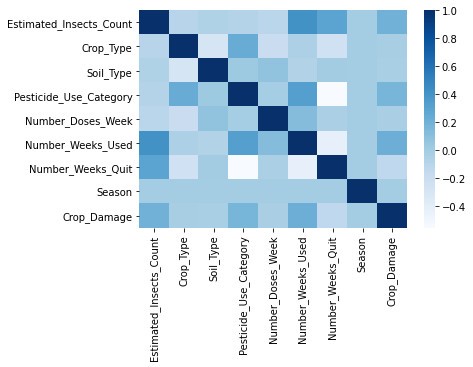

In [ ]:
plt.figure(figsize=(6,4))
sns.heatmap(train.corr(),cmap='Blues',annot=False)

### One Hot Encoding


In [ ]:
#X_train = pd.get_dummies(data=X_train, columns=['Crop_Type', 'Soil_Type', 'Pesticide_Use_Category','Season'])
#y_train = pd.get_dummies(data=y_train, columns=['Crop_Damage'])
#X_test = pd.get_dummies(data=X_test, columns=['Crop_Type', 'Soil_Type', 'Pesticide_Use_Category','Season'])
#y_test = pd.get_dummies(data=y_test, columns=['Crop_Damage'])

## Model Prototyping

### Inital Model Training

In [ ]:
#Random Forest Approach
from sklearn.metrics import accuracy_score

In [ ]:
# Import the model we are using
from sklearn.ensemble import RandomForestClassifier
# Instantiate model 
rf = RandomForestClassifier(n_estimators= 10, random_state=42)
# Train the model on training data
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
print('Accuracy:', round(accuracy, 2), '%.')
# THIS IS THE BASELINE MODEL

Accuracy: 0.83 %.


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state = 42)

from pprint import pprint

# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 80, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 17, 24, 31, 38, 45, 52, 59, 66, 73, 80, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 288, 377, 466, 555, 644, 733, 822, 911, 1000]}


In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier(random_state = 42)
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                              n_iter = 100, scoring='neg_mean_absolute_error', 
                              cv = 3, verbose=2, random_state=42, n_jobs=-1,
                              return_train_score=True)

# Fit the random search model
rf_random.fit(X_train, y_train);

In [ ]:
rf_random.best_params_

In [ ]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    accuracy = accuracy_score(test_labels,predictions)
    print('Model Performance')
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    return accuracy

base_model = RandomForestClassifier(n_estimators = 10, random_state = 42)
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_test, y_test)

In [ ]:
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, X_test, y_test)

In [ ]:
print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

In [ ]:
import joblib
import pickle
filename = 'best_random_FOREST_BIGGER_LEAF.sav'
joblib.dump(best_random, filename)

### Second Model Training

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [ ]:
import joblib
import pickle
filename = 'XGBOOST_IMPUTED.sav'
joblib.dump(best_xgboost_random, filename)

## Predictions

In [ ]:
import joblib
best_random_XGBOOST = joblib.load('XGBOOST_IMPUTED.sav')

[15:41:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
ID = test['ID']
test= test.drop(columns=['ID'])

In [ ]:
test.fillna(test.mean(), inplace=True)

In [ ]:
test

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,188,1,1,1,0,28.705094,0,2
1,410,1,1,1,0,0.000000,0,2
2,626,1,0,1,0,0.000000,0,2
3,731,1,0,1,0,0.000000,0,2
4,789,0,0,1,0,0.000000,0,1
...,...,...,...,...,...,...,...,...
59305,3337,1,0,2,20,34.000000,12,1
59306,3516,1,0,2,20,32.000000,10,2
59307,3702,1,0,2,10,28.705094,48,1
59308,3702,1,0,2,10,28.000000,17,2


In [ ]:

# Robust Scalar
from sklearn.preprocessing import RobustScaler
x_columns_test = test.columns
scaler = RobustScaler()
test[list(x_columns_test)] = scaler.fit_transform(test[list(x_columns_test)])
test.head()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,-0.877464,1.0,1.0,-1.0,-0.8,0.000000,-0.4375,0.0
1,-0.687232,1.0,1.0,-1.0,-0.8,-1.794068,-0.4375,0.0
2,-0.502142,1.0,0.0,-1.0,-0.8,-1.794068,-0.4375,0.0
3,-0.412168,1.0,0.0,-1.0,-0.8,-1.794068,-0.4375,0.0
4,-0.362468,0.0,0.0,-1.0,-0.8,-1.794068,-0.4375,-1.0


In [ ]:
'''SAVE PREDICTIONS'''
prediction = best_random_XGBOOST.predict(test)

In [ ]:
prediction

array([1.1404083 , 0.9313292 , 0.9498247 , ..., 0.218972  , 0.31664264,
       0.12515718], dtype=float32)

In [ ]:
import numpy as np
np.unique(prediction)

array([-0.2633915 , -0.26311684, -0.25339526, ...,  1.5364432 ,
        1.5367081 ,  1.7157723 ], dtype=float32)

In [ ]:
ID = pd.DataFrame(ID, columns=['ID'])

In [ ]:
ID

,ID
0,F00000002
1,F00000007
2,F00000011
3,F00000013
4,F00000014
...,...
59305,F00155937
59306,F00155940
59307,F00155941
59308,F00155943


In [ ]:
ID['Crop_Damage']= list(prediction)

In [ ]:
ID.to_csv('best_random_xgb.csv',index=False)